<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/intro/2021/intro_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition using CNNs

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

figsize_3d = (12, 12)

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

'2.4.1'

In [4]:
tf.random.set_seed(42)

In [5]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-f9ae6825-9806-91aa-e2f9-3eed3bf1da87)


In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
# if we do not want GPU
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [8]:
# https://github.com/AndreasMadsen/python-lrcurve
!pip install -q lrcurve

     |████████████████████████████████| 71kB 5.1MB/s 


In [9]:
# https://github.com/keisen/tf-keras-vis
# https://github.com/keisen/tf-keras-vis/blob/master/examples/attentions.ipynb
!pip install -q tf-keras-vis

In [10]:
from lrcurve import KerasLearningCurve

## Introducing image recognition: MobilNet V2 trained on the ImageNet database

http://image-net.org/

<a href='http://image-net.org/'>
<img src='https://djcordhose.github.io/ml-workshop/img/imagenet.png'>
</a>



In [11]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilnetv2_model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))
# mobilnetv2_model.summary()
len(mobilnetv2_model.layers)

14540800/14536120 [==============================] - 0s 0us/step


156

### Imagenet
* Collection of labelled images from many categories
* http://image-net.org/

http://image-net.org/about-stats

<table class="table-stats" style="width: 500px">
<tbody><tr>
<td width="25%"><b>High level category</b></td>
<td width="20%"><b># synset (subcategories)</b></td>
<td width="30%"><b>Avg # images per synset</b></td>
<td width="25%"><b>Total # images</b></td>
</tr>

<tr><td>amphibian</td><td>94</td><td>591</td><td>56K</td></tr>

<tr><td>animal</td><td>3822</td><td>732</td><td>2799K</td></tr>

<tr><td>appliance</td><td>51</td><td>1164</td><td>59K</td></tr>

<tr><td>bird</td><td>856</td><td>949</td><td>812K</td></tr>

<tr><td>covering</td><td>946</td><td>819</td><td>774K</td></tr>

<tr><td>device</td><td>2385</td><td>675</td><td>1610K</td></tr>

<tr><td>fabric</td><td>262</td><td>690</td><td>181K</td></tr>

<tr><td>fish</td><td>566</td><td>494</td><td>280K</td></tr>

<tr><td>flower</td><td>462</td><td>735</td><td>339K</td></tr>

<tr><td>food</td><td>1495</td><td>670</td><td>1001K</td></tr>

<tr><td>fruit</td><td>309</td><td>607</td><td>188K</td></tr>

<tr><td>fungus</td><td>303</td><td>453</td><td>137K</td></tr>

<tr><td>furniture</td><td>187</td><td>1043</td><td>195K</td></tr>

<tr><td>geological formation</td><td>151</td><td>838</td><td>127K</td></tr>

<tr><td>invertebrate</td><td>728</td><td>573</td><td>417K</td></tr>

<tr><td>mammal</td><td>1138</td><td>821</td><td>934K</td></tr>

<tr><td>musical instrument</td><td>157</td><td>891</td><td>140K</td></tr>


<tr><td>plant</td><td>1666</td><td>600</td><td>999K</td></tr>

<tr><td>reptile</td><td>268</td><td>707</td><td>190K</td></tr>

<tr><td>sport</td><td>166</td><td>1207</td><td>200K</td></tr>

<tr><td>structure</td><td>1239</td><td>763</td><td>946K</td></tr>

<tr><td>tool</td><td>316</td><td>551</td><td>174K</td></tr>

<tr><td>tree</td><td>993</td><td>568</td><td>564K</td></tr>

<tr><td>utensil</td><td>86</td><td>912</td><td>78K</td></tr>

<tr><td>vegetable</td><td>176</td><td>764</td><td>135K</td></tr>

<tr><td>vehicle</td><td>481</td><td>778</td><td>374K</td></tr>

<tr><td>person</td><td>2035</td><td>468</td><td>952K</td></tr>

</tbody></table>

In [12]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

import numpy as np

def predict(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])

### Let's try it out on a few images

In [13]:
!curl -O https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beagle_Upsy.jpg/440px-Beagle_Upsy.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44891  100 44891    0     0   402k      0 --:--:-- --:--:-- --:--:--  402k


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beagle_Upsy.jpg/440px-Beagle_Upsy.jpg'>

In [14]:
predict(model = mobilnetv2_model, img_path = '440px-Beagle_Upsy.jpg')

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02088364', 'beagle', 0.40957186), ('n02101388', 'Brittany_spaniel', 0.14605413), ('n02089867', 'Walker_hound', 0.12106488)]


In [15]:
!curl -O https://djcordhose.github.io/ml-workshop/img/cat-bonkers.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  843k  100  843k    0     0  3798k      0 --:--:-- --:--:-- --:--:-- 3798k


<img src='https://djcordhose.github.io/ml-workshop/img/cat-bonkers.png'>

In [16]:
predict(model = mobilnetv2_model, img_path = 'cat-bonkers.png')

Predicted: [('n02124075', 'Egyptian_cat', 0.43944395), ('n02123045', 'tabby', 0.4016349), ('n02123159', 'tiger_cat', 0.03556939)]


# Exercise: Try this out on two of your images

* If they are available on the internet, download them using CURL like the others
* If they are local, upload them using the files dialog on the left sidebar

How good are the results?
* How sure is the network about its prediction?
* Is it working well?
* Why do you think it is working well or not so well?
* How does this related to the imagenet database?


## Our example: Recognizing Speed Limit Signs

<img src='https://github.com/DJCordhose/ml-workshop/blob/master/img/speed-limit-signs.png?raw=1'>

## Getting the data

In [17]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/data/speed-limit-signs.zip
!unzip -qo speed-limit-signs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1795k  100 1795k    0     0  2132k      0 --:--:-- --:--:-- --:--:-- 2130k


In [18]:
# !ls -lR speed-limit-signs
!ls -l speed-limit-signs

total 28
drwxr-xr-x 2 root root 4096 Aug 28  2019 0
drwxr-xr-x 2 root root 4096 Aug 28  2019 1
drwxr-xr-x 2 root root 4096 Aug 28  2019 2
drwxr-xr-x 2 root root 4096 Aug 28  2019 3
drwxr-xr-x 2 root root 4096 Aug 28  2019 4
drwxr-xr-x 2 root root 4096 Aug 28  2019 5
-rw-r--r-- 1 root root  407 Aug 28  2019 README.md


In [19]:
!cat speed-limit-signs/README.md

Data extracted from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

From https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip just the samples for the speed limit signs 

## Format

https://en.wikipedia.org/wiki/Netpbm_format

Can be previewed on a Mac and be processed by http://scikit-image.org/

## Labels
- 0: 30
- 1: 50
- 2: 70
- 3: 80
- 4: 100
- 5: 120

## Loading and pre-processing

In [20]:
import os
from skimage import data, io, filters

ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")
type = ".ppm"

# Get all subdirectories of data_dir. Each represents a label.
directories = [d for d in os.listdir(data_dir) 
                if os.path.isdir(os.path.join(data_dir, d))]
# Loop through the label directories and collect the data in
# two lists, labels and images.
labels = []
images = []
for d in directories:
    label_dir = os.path.join(data_dir, d)
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(type)]
    # For each label, load it's images and add them to the images list.
    # And add the label number (i.e. directory name) to the labels list.
    for f in file_names:
        images.append(io.imread(f))
        labels.append(int(d))

images, labels = np.array(images), np.array(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [21]:
images.shape

(379,)

In [22]:
labels.shape

(379,)

In [23]:
unique_values, counts = np.unique(labels, return_counts=True)
classes = len(unique_values)
unique_values, counts, classes

(array([0, 1, 2, 3, 4, 5]), array([79, 81, 68, 53, 41, 57]), 6)

In [24]:
label_names = ['30', '50', '70', '80', '100', '120']

### First image for each Label

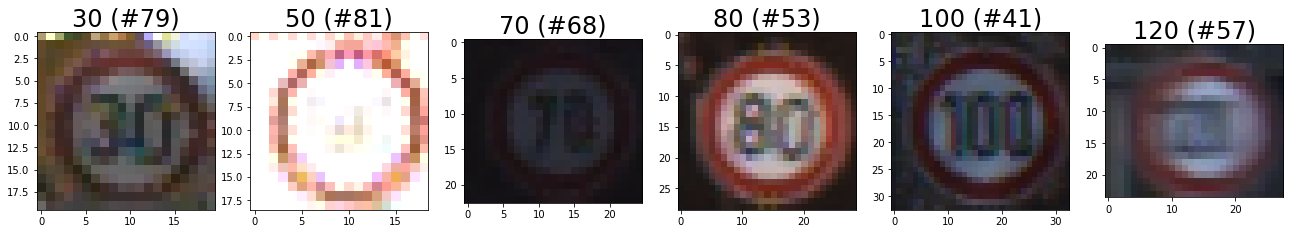

In [25]:
plt.figure(figsize=(30, 15))

i = 1
for label in unique_values:
    # Pick the first image for each label.
    image = images[np.where(labels == label)[0][0]]
    plt.subplot(1, 8, i)
    plt.title("{0} (#{1})".format(label_names[label], counts[label]))
    i += 1
    plt.imshow(image)

### Ooops, different resolutions (as you can see from the axes)

We need to have all of them with the same resolution

In [26]:
import skimage.transform

images_32 = np.array([skimage.transform.resize(image, (32, 32)) for image in images])

In [27]:
# 379 samples, 32x32 resoltion, 3 color channels
images_32.shape

(379, 32, 32, 3)

## How to tackle this using neural networks?

In [28]:
# turns whatever labels we have into a range of numbers
# not needed here as our signs actually are numbers already, but needed for the general case

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(unique_values)
int_labels = le.transform(labels)
# int_labels

In [29]:
X = images_32
y = int_labels

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((303, 32, 32, 3), (76, 32, 32, 3), (303,), (76,))

### Challenges for Images Recognition

1. Feeding all pixels into Dense Layers will work, but slow and many parameters 
1. Manual Feature extraction from images might work, but
   * is tedious and error prone
   * requires domain knowledge
   * needs frequent manual updates

### Convolutional networks will learn feature extraction before passing few features to Dense Layer Classifiers

https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

### VGG: a basic network architecture

<img src="https://djcordhose.github.io/ml-workshop/img/vgg.png">

_VGG starts with a number of convolutional blocks for feature extraction and ends with a fully connected classifier_

## VGG contains a number of specialized neural network layers

### Most important: Convolutional Layers - filtering for features

* applying a number of filter kernels
* result of a filter kernel is like a manual feature extraction
* by stacking filter operations we hope to extract meaningful features  
* parameters of the kernerls are initialized randomly
* parameters are learned during training

### Keras Implementation

```model.add(Conv2D(filters=32, activation='relu'))```

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

### How do they work?

<img src='https://djcordhose.github.io/ml-workshop/img/cnn-kernels.gif'>

https://sigmoidprime.com/post/the-inner-workings-of-convolutional-nets/
<br>
https://twitter.com/wster/status/1079741301418049537

### Pooling - reducing size

* reduces computational load
* prevents overfitting by removing details

<img src='http://cs231n.github.io/assets/cnn/pool.jpeg'>

<img src='http://cs231n.github.io/assets/cnn/maxpool.jpeg'>

### Keras Implementation

#### Pooling
```model.add(MaxPooling2D())```

#### Flatten 2d to make it accessible to Dense layers
```model.add(Flatten())```

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

### Interactive exploration

* https://github.com/okdalto/VisualizeMNIST
* https://transcranial.github.io/keras-js/#/mnist-cnn
* https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html
* http://setosa.io/ev/image-kernels/

In [31]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1

In [32]:
# this is no fun on CPU, on a weak i5 this takes up to 10 minutes, on decent gpu just under a minute
%%time

BATCH_SIZE=50
EPOCHS = 500

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2,
                    callbacks=[KerasLearningCurve()],
                    verbose=0
                    )

CPU times: user 41.4 s, sys: 3.05 s, total: 44.5 s
Wall time: 44.2 s


## Evaluation

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(model, X, y, file_name=None):
    y_pred = model.predict(X, batch_size=BATCH_SIZE).argmax(axis=1)
    cm = confusion_matrix(y, y_pred)
    figure = plt.figure(figsize=(10, 10))

    sns.heatmap(cm, annot=True, xticklabels=label_names, yticklabels=label_names, cmap='Blues', fmt='d')
    if file_name:
        plt.savefig('outputs/%s.png' % file_name)

In [34]:
def plot_accuracy(history, file_name=None):
    plt.figure()
    plt.xlabel('epochs')
    plt.ylabel('accuracy')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Accuracy', 'Validation Accuracy']);
    if file_name:
        plt.savefig('outputs/%s.png' % file_name)

In [35]:
def plot_loss(history, file_name=None):
    plt.figure()

    plt.xlabel('epochs')
    plt.ylabel('loss')

    plt.yscale('log')

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Loss', 'Validation Loss']);
    if file_name:
        plt.savefig('outputs/%s.png' % file_name)

In [36]:
def plot_gallery(model, X, y, size=15, file_name=None):
    y_pred_raw = model.predict(X, batch_size=BATCH_SIZE)
    certainty = y_pred_raw.max(axis=1)
    y_pred = y_pred_raw.argmax(axis=1)

    figure = plt.figure(figsize=(40, 12))
    # plt.title('Test Samples')
    if size:
        samples = np.random.choice(X.shape[0], size=size, replace=False)
    else:
        # just all
        samples = np.arange(0, X.shape[0])
    for i, index in enumerate(samples):
        ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        # Display each image
        ax.imshow(np.squeeze(X[index]), cmap='gray')
        predict_index = y_pred[index]
        true_index = y[index]
        # Set the title for each image
        ax.set_title("{} ({} / {}) {:.2f}: {}".format(
                                    label_names[predict_index], 
                                    label_names[true_index],
                                    true_index,
                                    certainty[index],
                                    index),
                                      color=("green" if predict_index == true_index else "red"))
    if file_name:
        plt.savefig('outputs/%s.png' % file_name)
    return certainty.max(), certainty.min(), certainty.mean()

In [37]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
train_loss, train_accuracy

(0.25429514050483704, 0.9603960514068604)

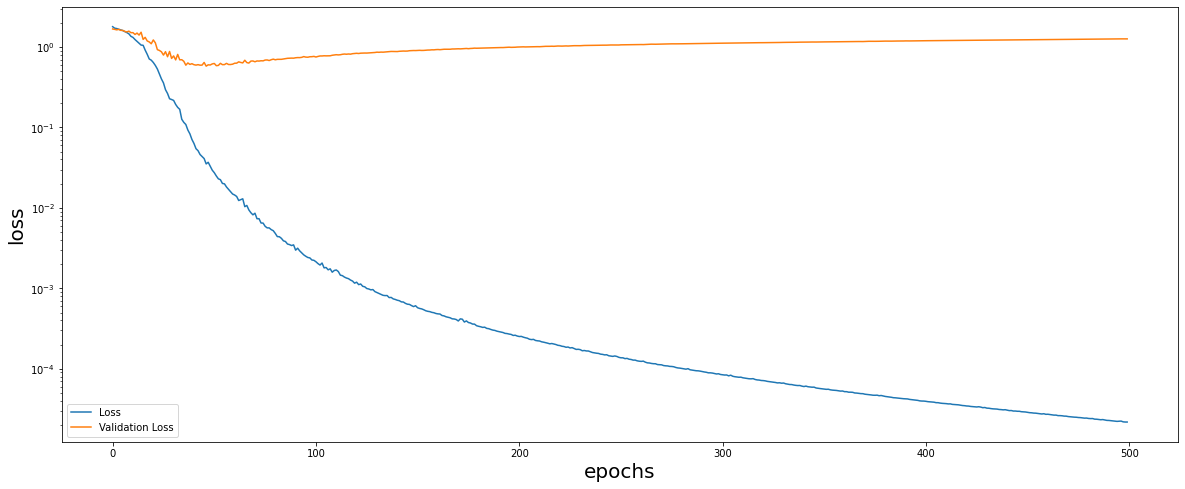

In [38]:
plot_loss(history)

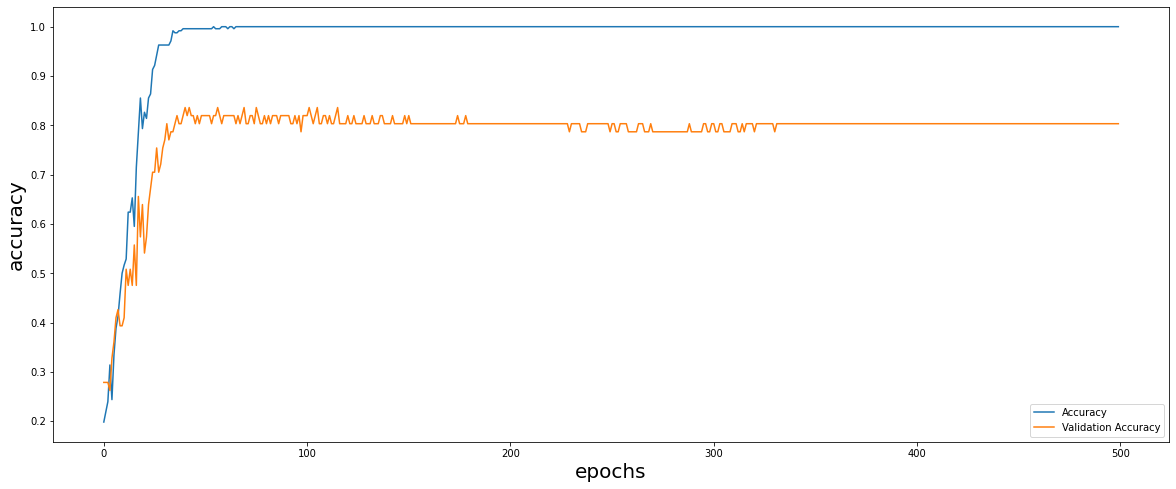

In [39]:
plot_accuracy(history)

In [40]:
y_pred = model.predict(X).argmax(axis=1)
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 1, 1,

## Confusion Matrix
* row: true
* column: predicted

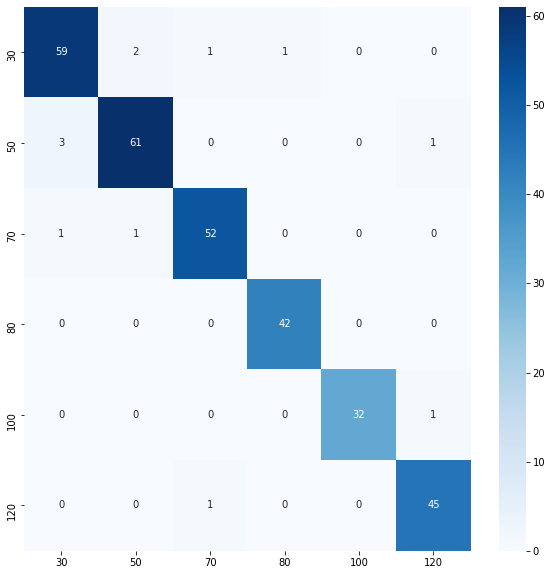

In [41]:
plot_cm(model, X_train, y_train)

(1.0, 0.42374557, 0.9845515)

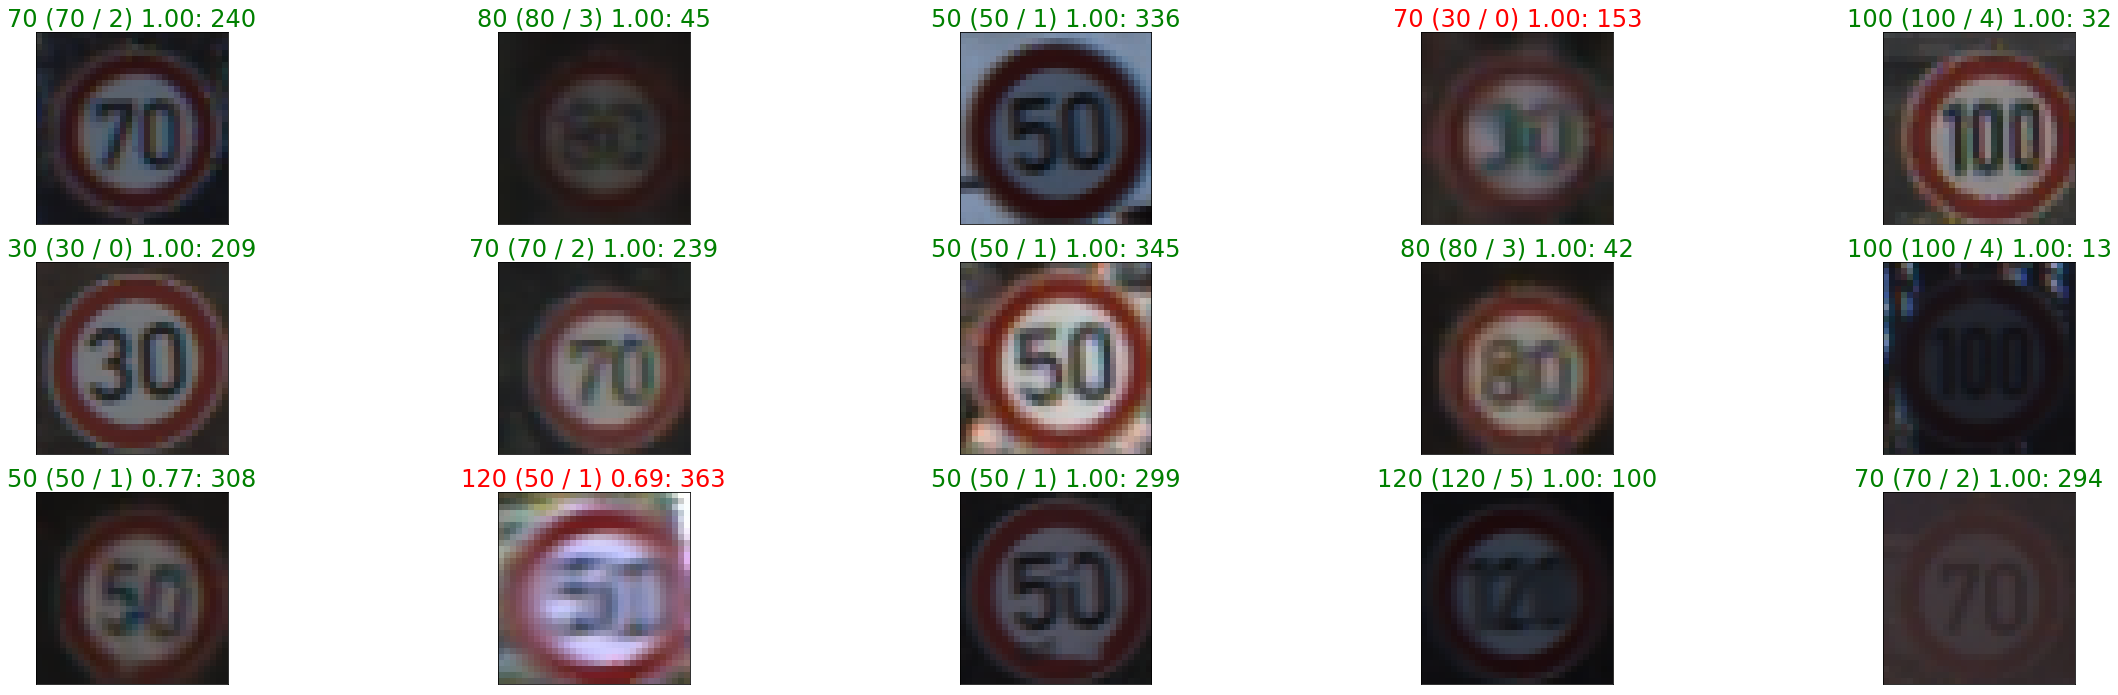

In [42]:
plot_gallery(model, X, y)

In [43]:
model.save('speed-signs-simple.h5')

# Exercise: Prevent Overfitting on our VGG model

_For CNN you use the same means of regularization as for other NNs_

Log each experiment and all the parameters that seem relevant

Things you can try
* add Dropout (already prepared)
  * sort of ensemble learning - only use a certain amount of all neurons for each batch
* add BatchNormalization (already prepared)
  * normalize each batch to make it easier to digest for next layer
* train for more/less epochs
* other/more/less layers
* less/more nodes per layer
* different sequence, less/more filters
* higher batch size
* other optimizer

In [44]:
# * https://mlflow.org/
#   * https://mlflow.org/docs/latest/quickstart.html
#   * https://mlflow.org/docs/latest/tutorials-and-examples/tutorial.html
# * https://github.com/mlflow/mlflow
# https://stackoverflow.com/questions/61615818/setting-up-mlflow-on-google-colab
# https://mlflow.org/docs/latest/quickstart.html#using-the-tracking-api

!pip install mlflow --quiet
!pip install pyngrok --quiet

# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background

# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

     |████████████████████████████████| 14.2MB 7.4MB/s 
     |████████████████████████████████| 1.1MB 37.7MB/s 
     |████████████████████████████████| 153kB 39.3MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 378kB 40.0MB/s 
     |████████████████████████████████| 163kB 46.4MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 747kB 8.6MB/s 
MLflow Tracking UI: https://dccc80ed73c2.ngrok.io


In [45]:
X_experiment, X_val, y_experiment, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
X_experiment.shape, X_val.shape, y_experiment.shape, y_val.shape

((242, 32, 32, 3), (61, 32, 32, 3), (242,), (61,))

CPU times: user 45.7 s, sys: 2.99 s, total: 48.7 s
Wall time: 48.5 s


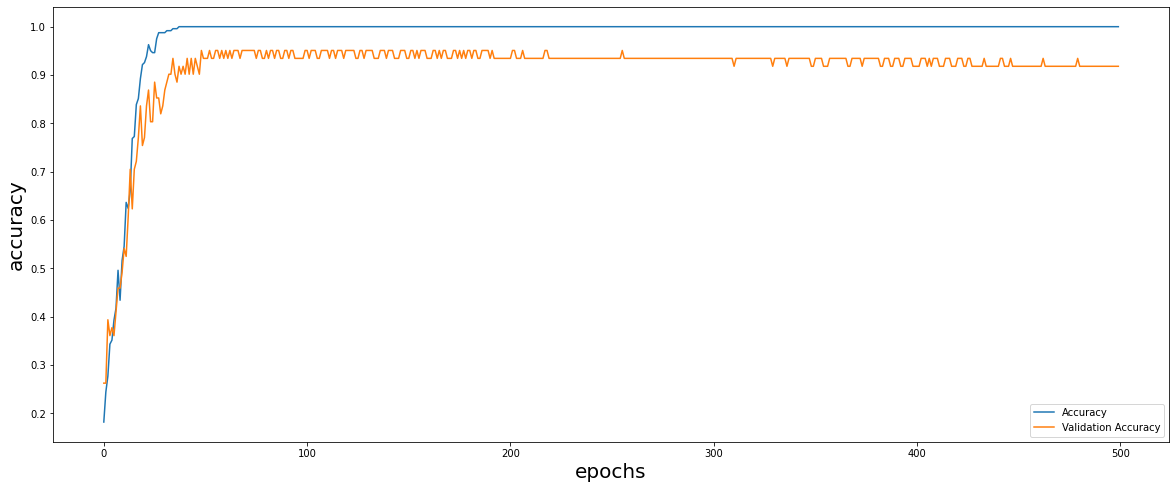

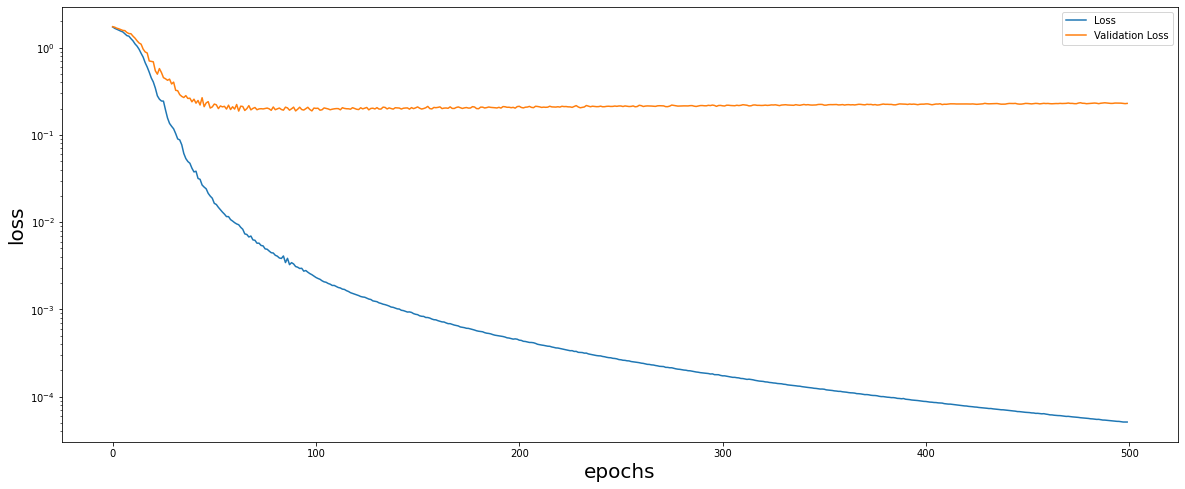

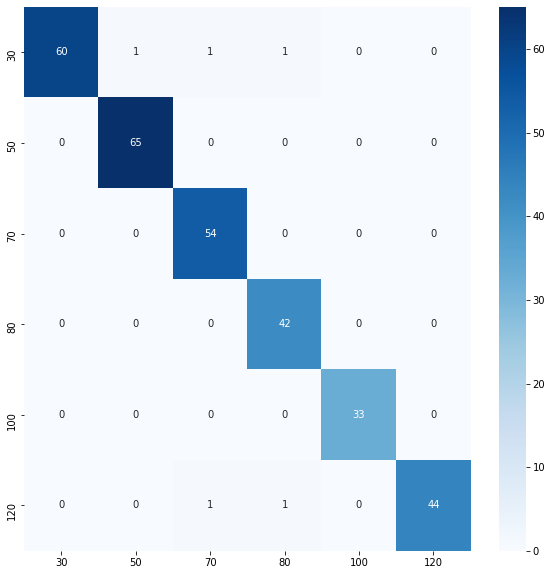

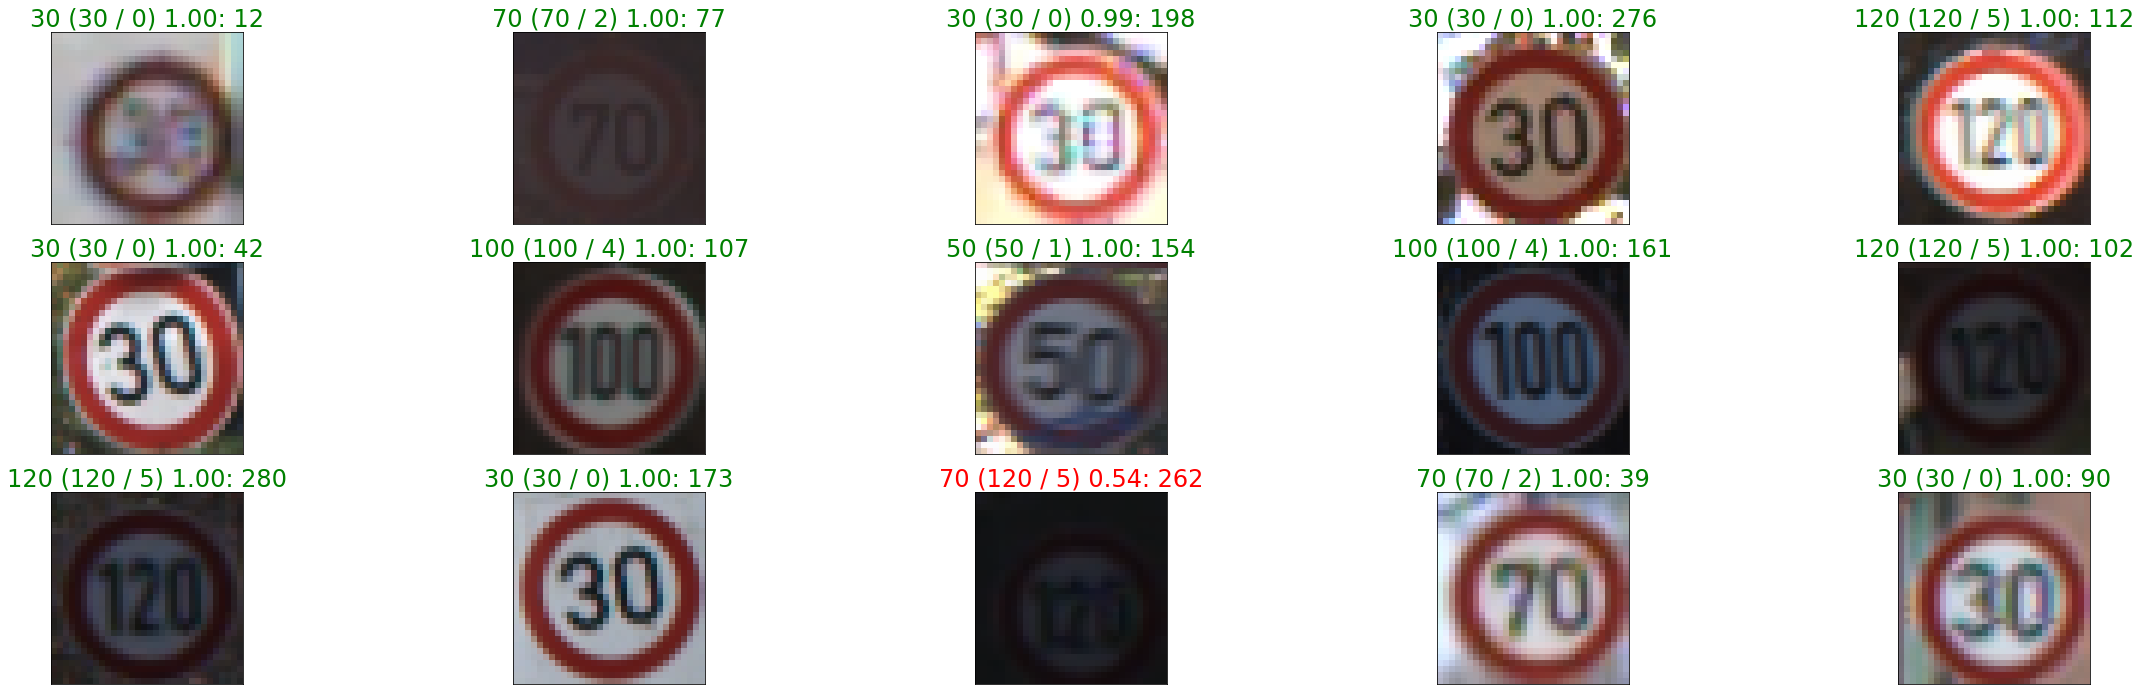

In [46]:
%%time

import shutil
shutil.rmtree('outputs', ignore_errors=True)
os.makedirs("outputs")

import mlflow
from mlflow import log_metric, log_param, log_artifacts

BN = False
DROPOUT = False
DROPOUT_RATE = 0.5

# highter batch size: more memory, maybe better generalization
BATCH_SIZE=50
EPOCHS = 500

# default
LEARNING_RATE = 0.001
# faster
# LEARNING_RATE = 0.01
# slower
# LEARNING_RATE = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# SGD might generalize better
# default
# LEARNING_RATE = 0.01
# slower
# LEARNING_RATE = 0.005
# even slower
# LEARNING_RATE = 0.001
# faster
# LEARNING_RATE = 0.05
# even faster
# LEARNING_RATE = 0.1
# optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

# https://www.mlflow.org/docs/latest/tutorials-and-examples/tutorial.html
# https://mlflow.org/docs/latest/quickstart.html
# https://docs.databricks.com/applications/mlflow/index.html
with mlflow.start_run():

  model = tf.keras.Sequential(name='Custom_VGG')

  model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3))) 
  if BN:
    model.add(BatchNormalization())
  model.add(MaxPooling2D())
  if DROPOUT:
    model.add(Dropout(rate=DROPOUT_RATE))

  model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  if BN:
    model.add(BatchNormalization())
  model.add(MaxPooling2D())
  if DROPOUT:
    model.add(Dropout(rate=DROPOUT_RATE))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  if BN:
    model.add(BatchNormalization())
  if DROPOUT:
    model.add(Dropout(rate=DROPOUT_RATE))
  model.add(Dense(classes, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

  log_param("optimizer", optimizer.__class__.__name__)
  log_param("lr", LEARNING_RATE)
  log_param("batch size", BATCH_SIZE)
  log_param("batch normalization", BN)
  log_param("dropout", DROPOUT)
  log_param("dropout rate", DROPOUT_RATE)
  log_param("epochs", EPOCHS)
  log_param("architecture", model.name)

  history = model.fit(X_experiment, y_experiment, 
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      validation_data=(X_val, y_val),
                      callbacks=[KerasLearningCurve()],
                      verbose=0
                      )
  
  loss, accuracy = model.evaluate(X, y, batch_size=BATCH_SIZE, verbose=0)
  train_loss, train_accuracy = model.evaluate(X_experiment, y_experiment, batch_size=BATCH_SIZE, verbose=0)
  val_loss, val_accuracy = model.evaluate(X_val, y_val, batch_size=BATCH_SIZE, verbose=0)

  log_metric("train acc", train_accuracy)
  log_metric("val acc", val_accuracy)
  
  plot_accuracy(history, file_name='acc')
  plot_loss(history, file_name='loss')
  plot_cm(model, X_train, y_train, file_name='train_cm')
  plot_gallery(model, X_train, y_train, file_name='train_gallery')

  # https://www.tensorflow.org/guide/keras/save_and_serialize
  model.save('outputs/model.h5')
  
  log_artifacts("outputs")

## Finally, try the model with test data to validate you have not overfitted implictly

_should be close to validation score_

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
test_loss, test_accuracy

(1.3869444131851196, 0.8157894611358643)

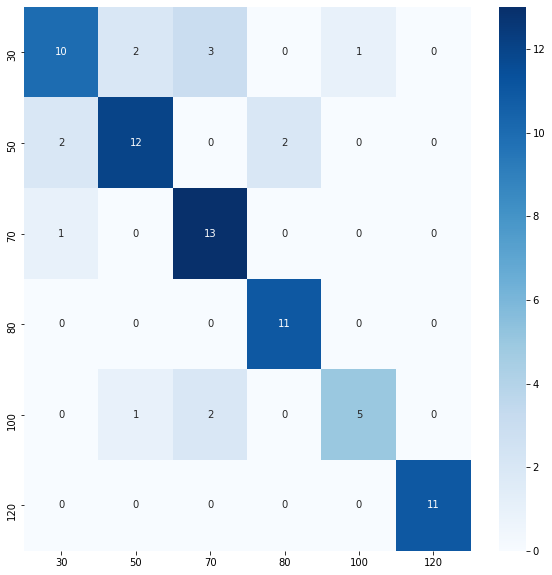

In [48]:
plot_cm(model, X_test, y_test)

# Alternative: Standard CNN Architectures (optional)

<img src='https://miro.medium.com/max/1400/1*n16lj3lSkz2miMc_5cvkrA.jpeg'>

https://towardsdatascience.com/neural-network-architectures-156e5bad51ba

### ResNet
* basic ideas
  * depth does matter
  * 8x deeper than VGG
  * possible by using shortcuts and skipping final fc layer
  * prevents vanishing gradient problem
* https://medium.com/towards-data-science/neural-network-architectures-156e5bad51ba

http://arxiv.org/abs/1512.03385
![Deep Learning](https://raw.githubusercontent.com/DJCordhose/ai/master/docs/img/residual.png)

### Mobilenet

_MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications https://arxiv.org/abs/1704.04861_
  * Spares Dense Layers at the end, thus vastly reducing parameters

_MobileNetV2: Inverted Residuals and Linear Bottlenecks https://arxiv.org/abs/1801.04381_

* reduces computational load from ResNet
* uses Depthwise Separable Convolutions, which is much more efficient, but can not perform as many different filters
* recommended to try first, often simply gets the job done

https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728



## Keras Applications

Keras provides us with a lot of pre-defined network architectures for image classification (like ResNet and MobileNet)

https://keras.io/applications/

* Mobilenet: https://keras.io/applications/#mobilenet
  * final Logits layer has softmax activation: https://github.com/keras-team/keras-applications/blob/master/keras_applications/mobilenet_v2.py
* ResNet: https://keras.io/applications/#resnet50


In [49]:
# https://keras.io/api/applications/resnet/#resnet50v2-function

from tensorflow.keras.applications import ResNet50V2
model = ResNet50V2(classes=classes, weights=None, input_shape=(32, 32, 3))
# model.summary()
len(model.layers)

192

# Exercise: Choose a standard architecture (there are more) and try it agains our custom model

* use the existing code above and simply replace the model
* use the code above for the new model
* regularization is harder to tweak, try SGD as an additional means



# Optional: Fine grained analysis of training results

In [50]:
!ls -l outputs

total 6532
-rw-r--r-- 1 root root   35542 Apr 11 08:49 acc.png
-rw-r--r-- 1 root root   37597 Apr 11 08:49 loss.png
-rw-r--r-- 1 root root 6463880 Apr 11 08:50 model.h5
-rw-r--r-- 1 root root   15247 Apr 11 08:49 train_cm.png
-rw-r--r-- 1 root root  122910 Apr 11 08:50 train_gallery.png


In [51]:
model = tf.keras.models.load_model('outputs/model.h5')
model.name

'Custom_VGG'

## Training data

In [52]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([63, 65, 54, 42, 33, 46]))

(1.0, 0.5002614, 0.99157697)

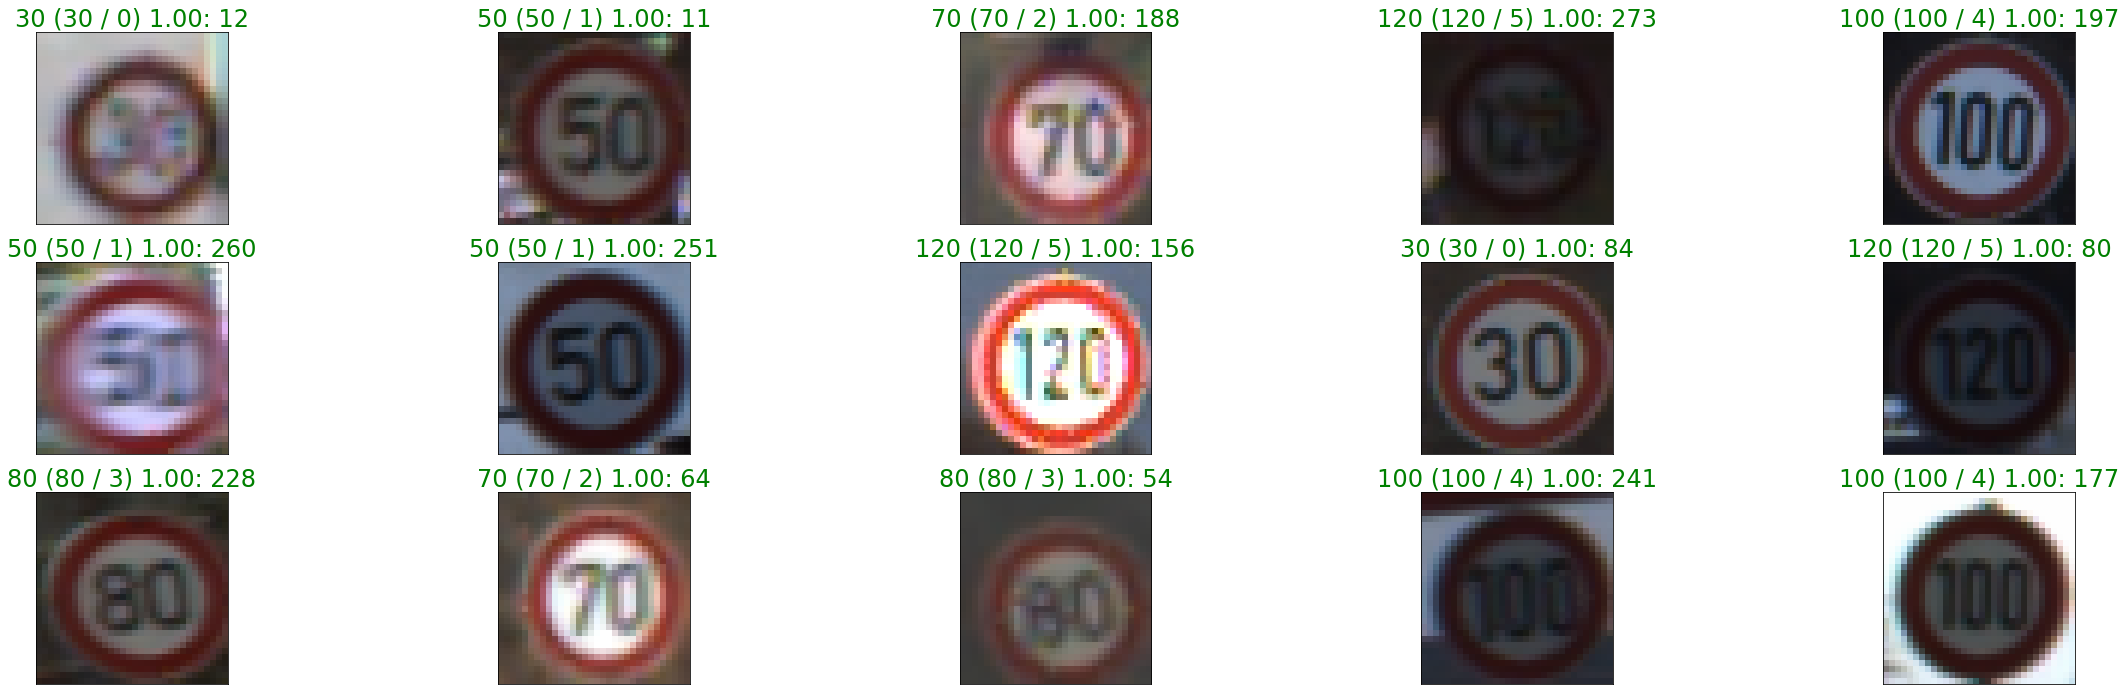

In [53]:
plot_gallery(model, X_train, y_train)

## Test data

In [54]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([16, 16, 14, 11,  8, 11]))

(1.0, 0.48493195, 0.9664147)

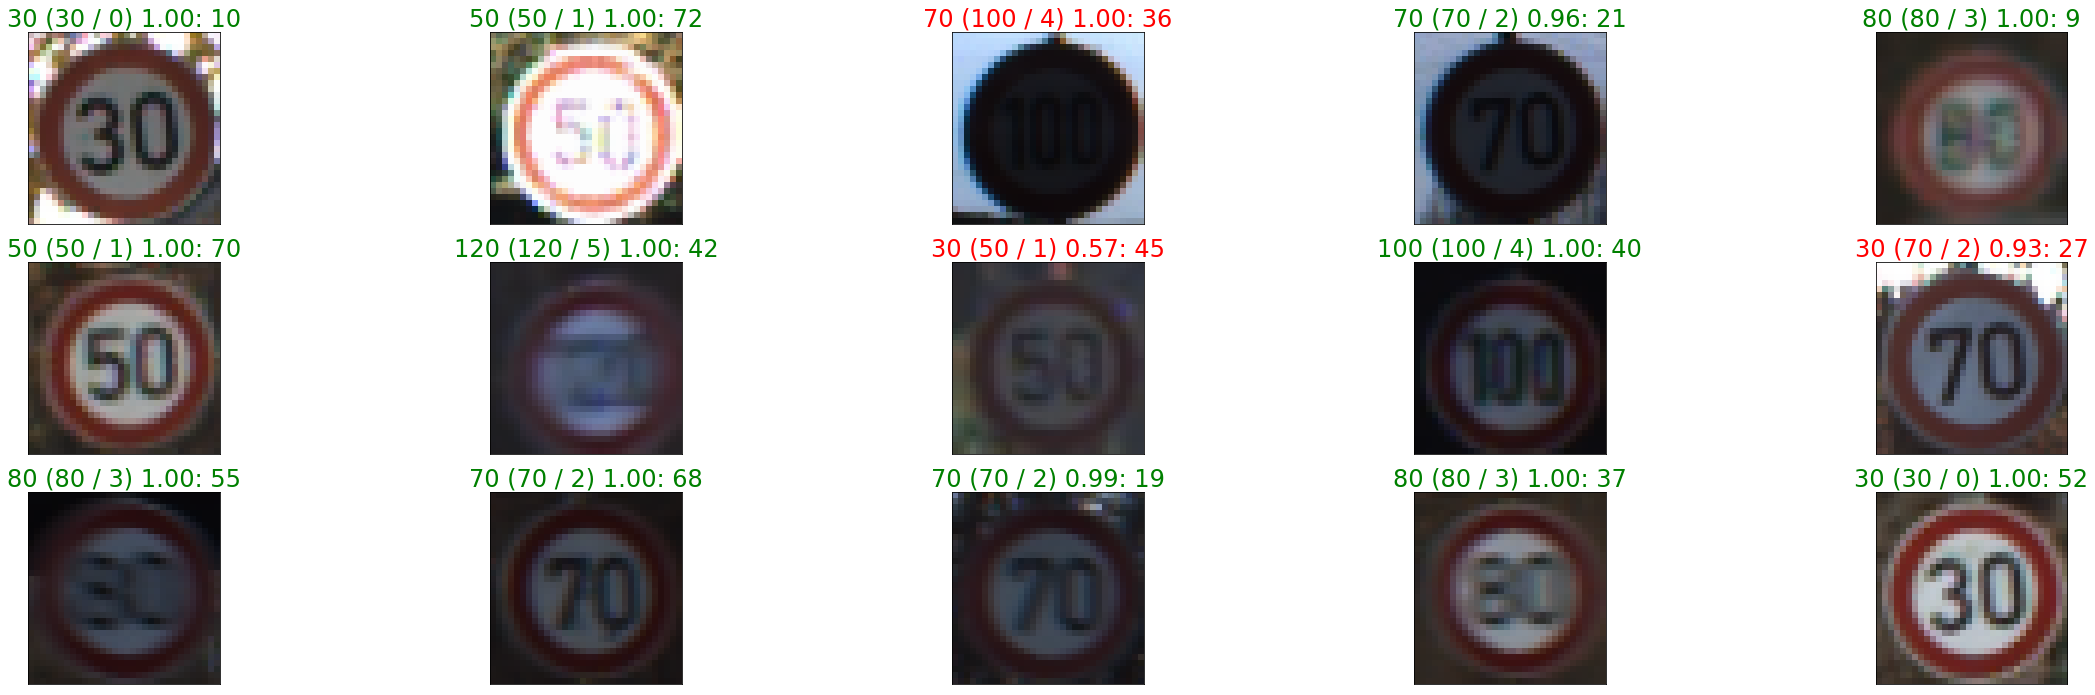

In [55]:
plot_gallery(model, X_test, y_test)

## Individual categories

In [56]:
cat_nr = 0

In [57]:
categories = np.unique(y_test, return_inverse=True)[1]
# categories

In [58]:
cat = np.where(categories == cat_nr)
# cat

(1.0, 0.48493195, 0.939306)

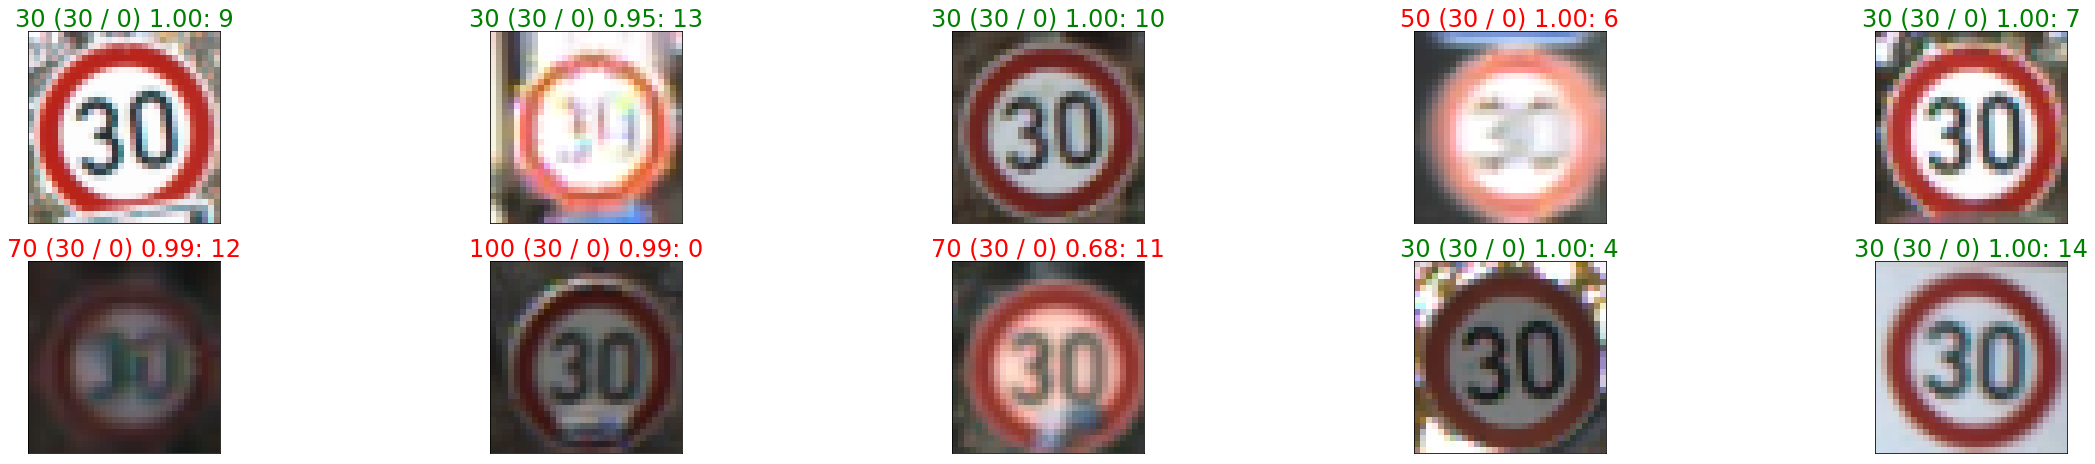

In [59]:
plot_gallery(model, X_test[cat], y_test[cat], size=10)

## Low certainty

In [60]:
y_pred_raw = model.predict(X, batch_size=BATCH_SIZE)
certainty = y_pred_raw.max(axis=1)
certainty.max(), certainty.min(), certainty.mean()

(1.0, 0.48493314, 0.98653126)

In [61]:
threshold = 0.7

In [62]:
certainty_cat = np.where(certainty < threshold)
certainty_cat

(array([115, 162, 168, 188, 211, 308, 368]),)

(0.67860925, 0.48493195, 0.5507041)

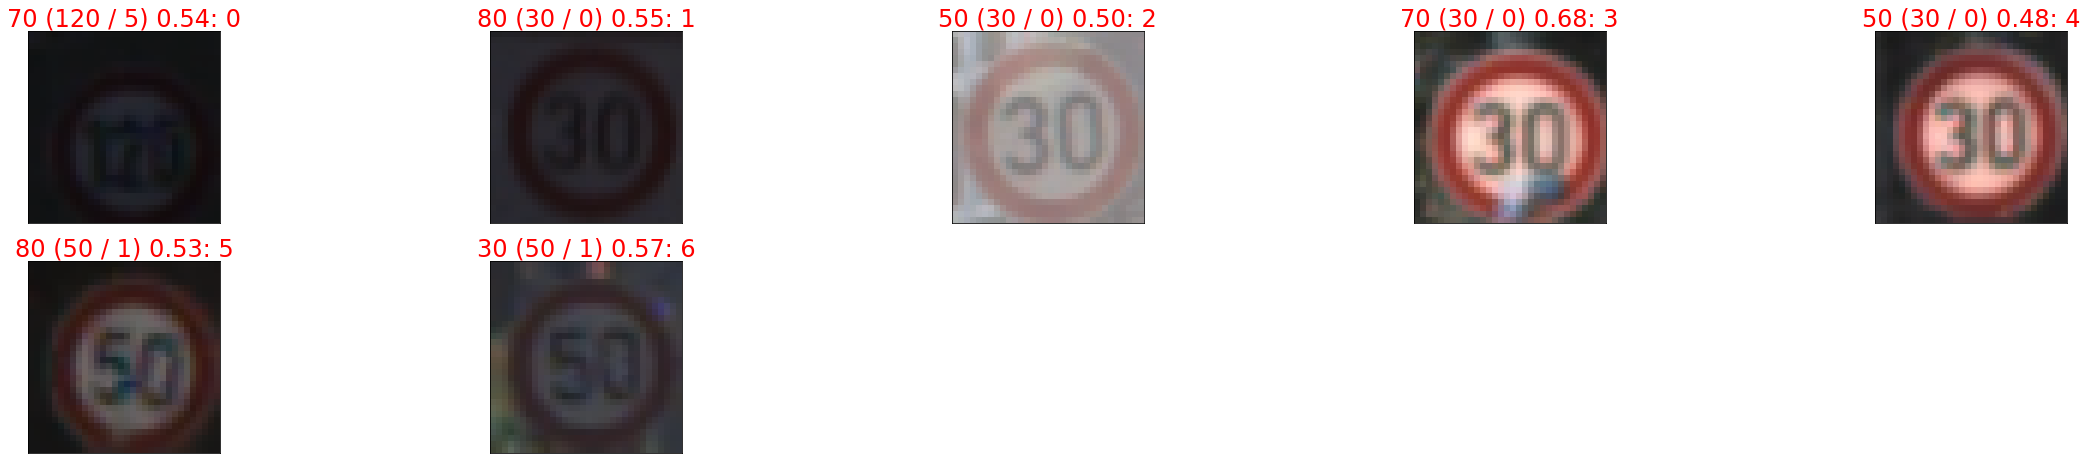

In [63]:
plot_gallery(model, X[certainty_cat], y[certainty_cat], size=None)

## Wrong ones

In [64]:
y_pred_raw = model.predict(X, batch_size=BATCH_SIZE)
y_pred = y_pred_raw.argmax(axis=1)

In [65]:
wrong_cat = np.where(y_pred != y)
wrong_cat

(array([ 17,  24,  36,  96, 115, 153, 162, 165, 168, 172, 181, 188, 203,
        211, 268, 305, 308, 357, 368]),)

(0.99999976, 0.48493195, 0.81559026)

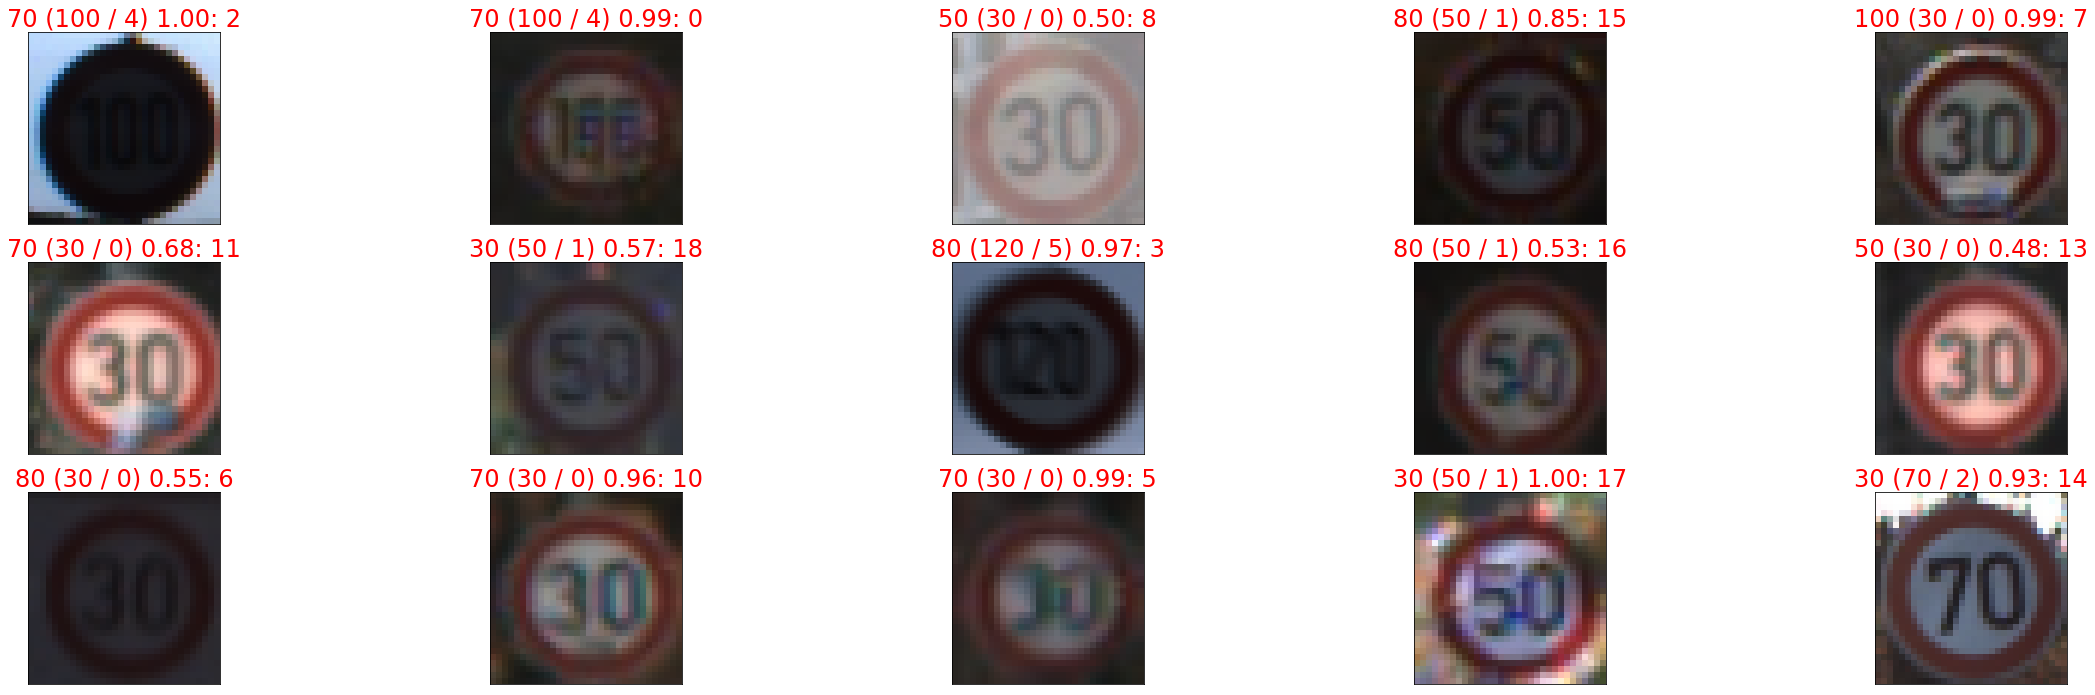

In [68]:
plot_gallery(model, X[wrong_cat], y[wrong_cat])

## Rights ones

In [69]:
y_pred_raw = model.predict(X, batch_size=BATCH_SIZE)
y_pred = y_pred_raw.argmax(axis=1)

In [70]:
right_cat = np.where(y_pred == y)
right_cat

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  18,  19,  20,  21,  22,  23,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161,
        163, 164, 166, 167, 169, 170, 171, 173, 174, 175, 176, 177, 178,
        179, 180, 182, 183, 184, 185, 186, 187, 189

(1.0, 0.76485205, 0.9955531)

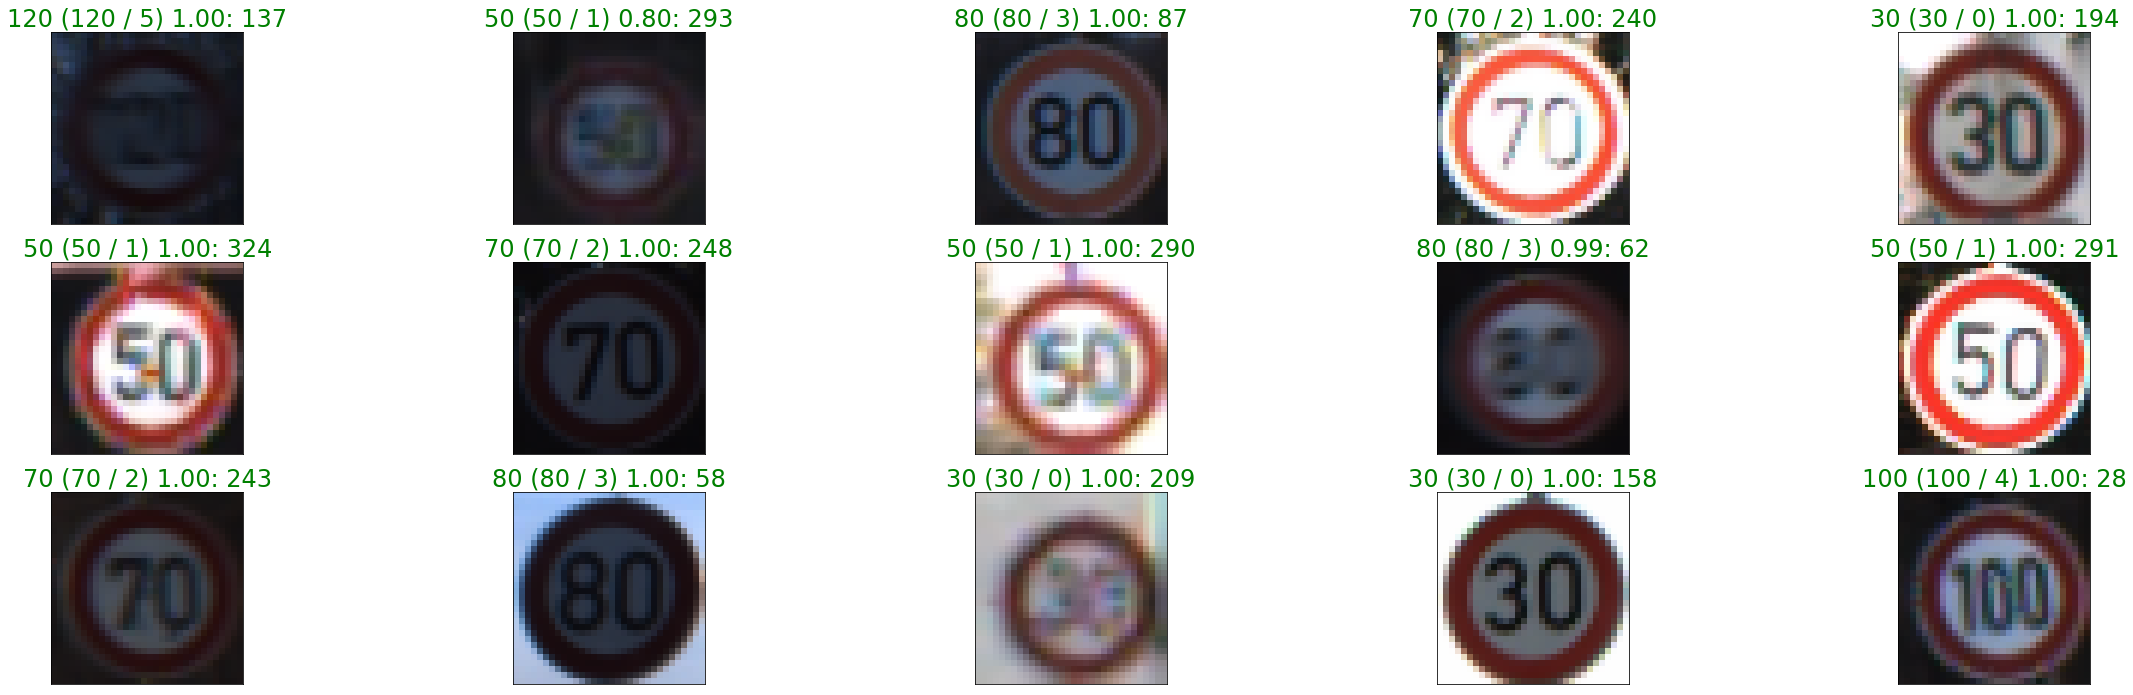

In [71]:
plot_gallery(model, X[right_cat], y[right_cat])

# Exercise: Can you draw any conclusions from this analysis?

* What are open questions?
* What could you do to improve the training result?

# Optional: What part of the image does the network use?

In [72]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

from tensorflow.keras import backend as K

def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m


def plot_map(index, map_only=False):
    image = X[index]
    label = y[index]

    saliency_images = np.array([image], dtype='float32')
    
    def input_output_mapping(output):
        return (output[0][label])
    
    saliency = Saliency(model,
                    model_modifier=model_modifier,
                    clone=False)

    saliency_map = saliency(input_output_mapping, saliency_images)
    saliency_map = normalize(saliency_map)
    
    if map_only:
      plt.imshow(saliency_map[0], cmap='jet')
    else:
      plt.imshow(image);
      plt.imshow(saliency_map[0], cmap='jet', alpha=0.3);


(1.0, 0.48493314, 0.98653126)

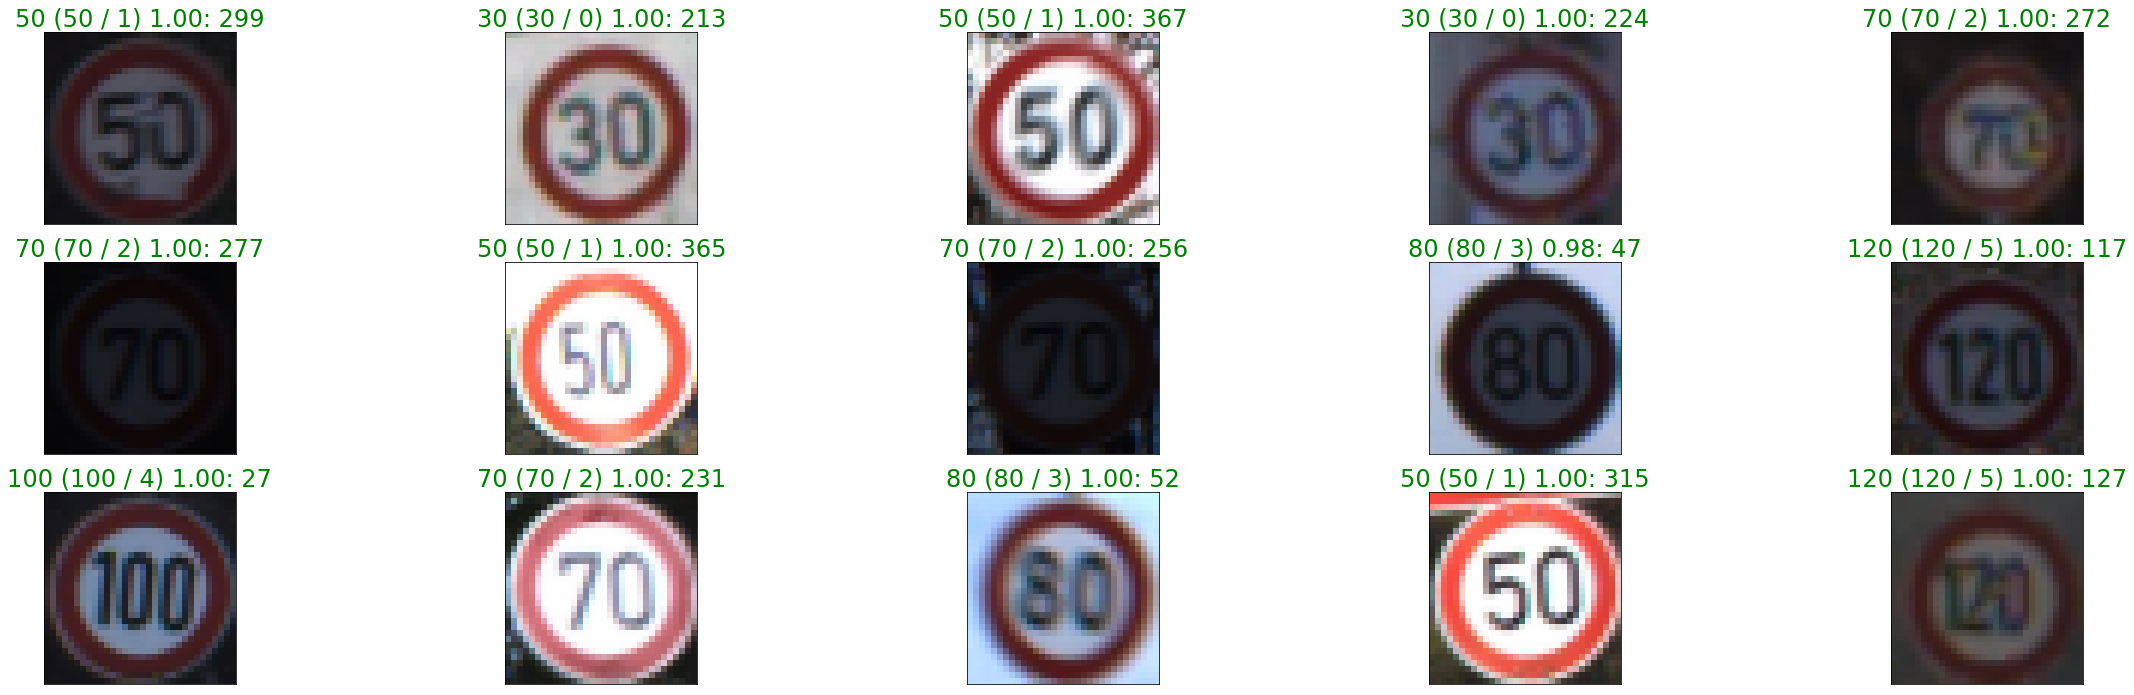

In [73]:
plot_gallery(model, X, y)

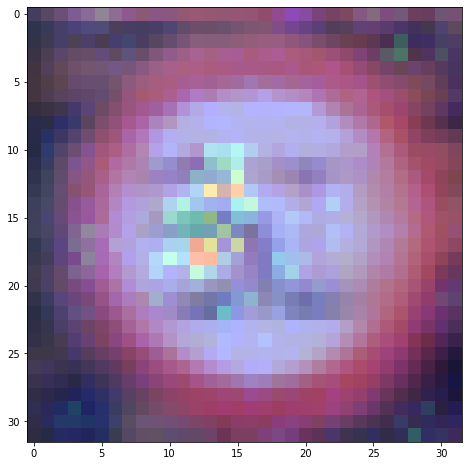

In [74]:
index = 359
plot_map(index)
# plot_map(index, map_only=True)

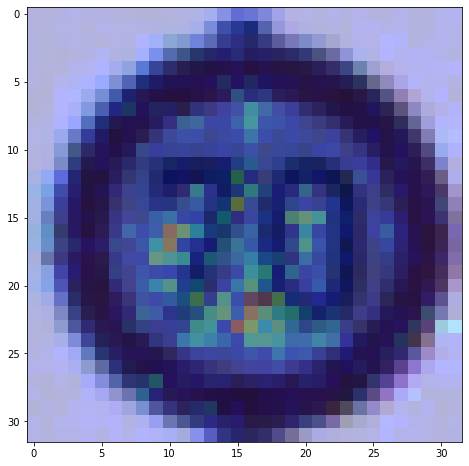

In [75]:
plot_map(248)
# plot_map(248, map_only=True)

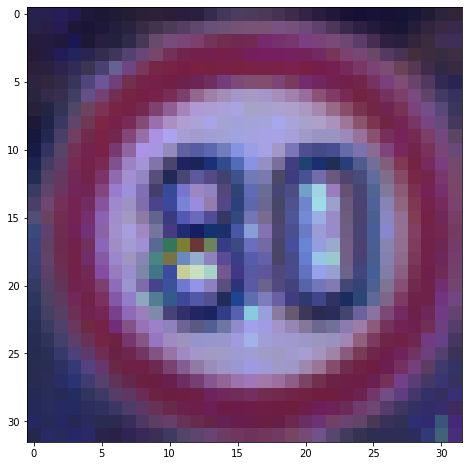

In [76]:
plot_map(54)
# plot_map(54, map_only=True)

# Exercise: Try saliency maps with more images

* Would you say the training is a success?
* What does the prediction concentrate on?
* Do you see differences between the groups we analyzed before?